<a href="https://colab.research.google.com/github/kjmobile/lb/blob/main/4_KNN_Q.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [277]:
import pandas as pd
import numpy as np
!pip install pymysql

In [278]:
# import data from mySQL database  using the following info host: kaylee-db.cbgcswckszgl.us-east-1.rds.amazonaws.com, id cob, password 1212, db='data', port 3306

import pymysql.cursors

# Connect to the database
connection = pymysql.connect(host='kaylee-db.cbgcswckszgl.us-east-1.rds.amazonaws.com',
                             user='cob',
                             password='1212',
                             db='data',
                             cursorclass=pymysql.cursors.DictCursor)

try:
    # Create a cursor object
    with connection.cursor() as cursor:
        # Execute the SQL query to fetch all data from the 'data' table
        cursor.execute("SELECT * FROM data.fish_k")

        # Fetch all the results
        results = cursor.fetchall()

        # Convert the results to a Pandas DataFrame
        fish_k = pd.DataFrame(results)

finally:
    # Close the connection
    connection.close()

#Print the DataFrame
fish_k['species'] = [1 if s=='Swedish' else 0 for s in fish_k["species"]] # species : 1 for Swedish 0 for McFish.
print(fish_k)

    length  weight  species
0     25.4   242.0        1
1     26.3   290.0        1
2     26.5   340.0        1
3     29.0   363.0        1
4     29.0   430.0        1
5     29.7   450.0        1
6     29.7   500.0        1
7     30.0   390.0        1
8     30.0   450.0        1
9     30.7   500.0        1
10    31.0   475.0        1
11    31.0   500.0        1
12    31.5   500.0        1
13    32.0   340.0        1
14    32.0   600.0        1
15    32.0   600.0        1
16    33.0   700.0        1
17    33.0   700.0        1
18    33.5   610.0        1
19    33.5   650.0        1
20    34.0   575.0        1
21    34.0   685.0        1
22    34.5   620.0        1
23    35.0   680.0        1
24    35.0   700.0        1
25    35.0   725.0        1
26    35.0   720.0        1
27    36.0   714.0        1
28    36.0   850.0        1
29    37.0  1000.0        1
30    38.5   920.0        1
31    38.5   955.0        1
32    39.5   925.0        1
33    41.0   975.0        1
34    41.0   950.0  

In [204]:
fish_X= fish_k.iloc[:,:2].to_numpy()
fish_y=fish_k['species'].to_numpy()

In [205]:
fish_X.shape

(49, 2)

In [218]:
fish_y.shape

(49,)

In [219]:
fish_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

## Plot the data with the actual label info ('Beamer', 'Swedish') in fish_y.

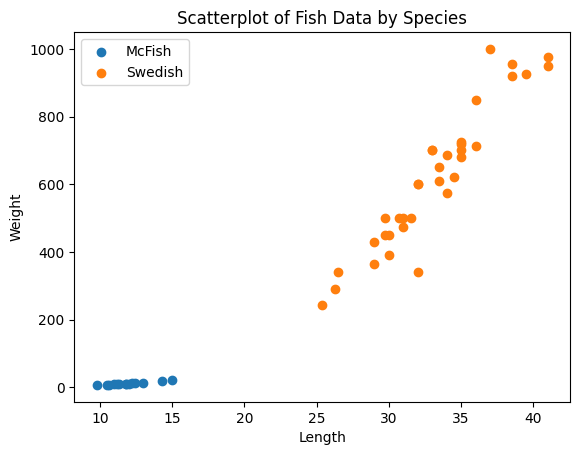

In [220]:
import matplotlib.pyplot as plt

# Create a scatter plot for each group
plt.scatter(fish_X[fish_y == 0, 0], fish_X[fish_y == 0, 1], label="McFish")
plt.scatter(fish_X[fish_y == 1, 0], fish_X[fish_y == 1, 1], label="Swedish")

# Add labels and title
plt.xlabel("Length")
plt.ylabel("Weight")
plt.title("Scatterplot of Fish Data by Species")

# Add legend and show plot
plt.legend()
plt.show()


#Preprocessing :  Train Test Split

In [208]:
from sklearn.model_selection import train_test_split

In [209]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_X, fish_y, random_state=42)

In [210]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [211]:
print(train_target.shape, test_target.shape)

(36,) (13,)


In [217]:
train_target

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [216]:
print(test_target)

[1 0 0 0 1 1 1 1 1 1 1 1 1]


In [213]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [214]:
kn.predict(test_input)

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

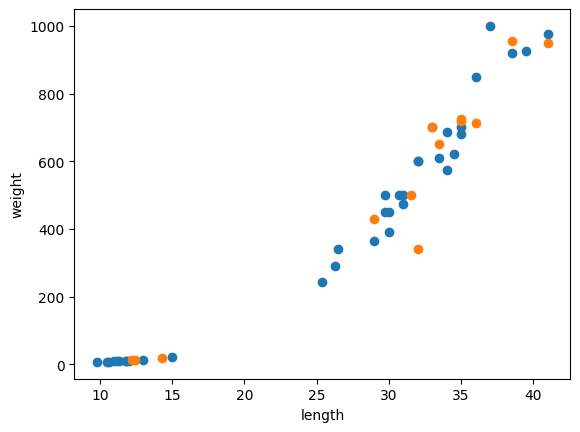

In [215]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# Test One Fish!

In [281]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [282]:
print(kn.predict([[25, 150]]))

[0]


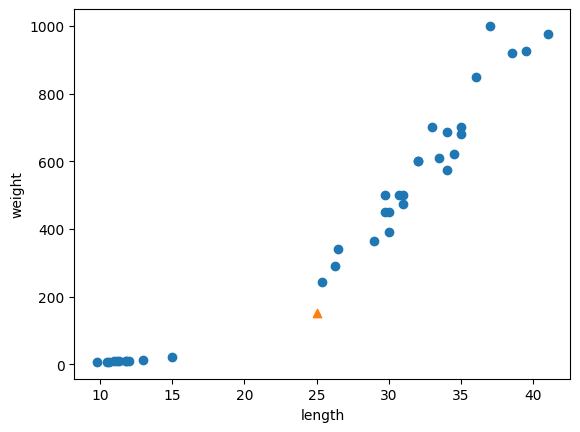

In [283]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [225]:
kn.kneighbors?

In [284]:
distances, indexes = kn.kneighbors([[25,150]])

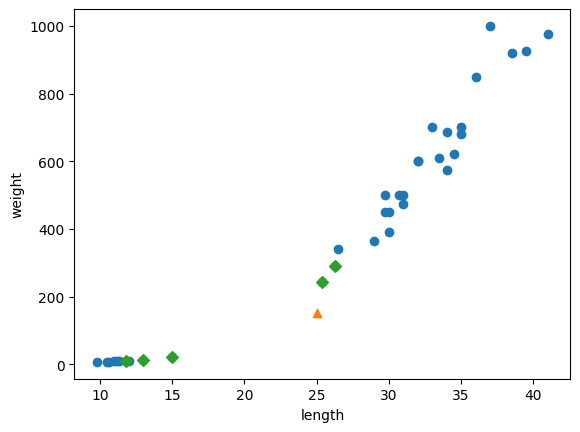

In [285]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [286]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 13.   12.2]
  [ 26.3 290. ]
  [ 11.8  10. ]]]


In [287]:
print(train_target[indexes])

[[1 0 0 1 0]]


In [288]:
print(distances)

[[ 92.00086956 130.48375378 138.32150953 140.00603558 140.62090883]]


# Plot with comparable xlim (i.e., same scope of length as weight)

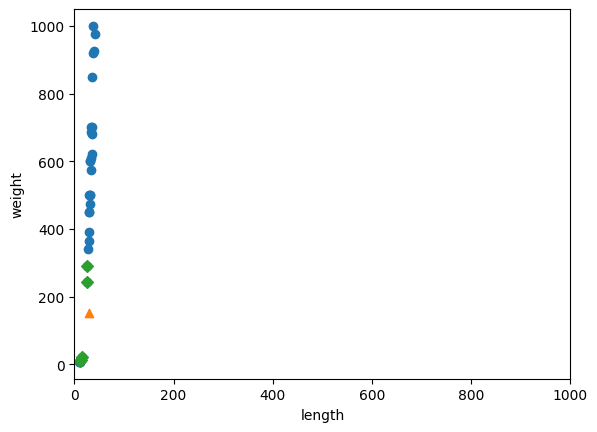

In [289]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(30, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#With this shape data, the length of the fish (x-axis) would not affect finding the nearest neighbors.
#Only the weight of the fish (y-axis) would be considered.
#--> Standardization of "scale" is necessary in training "distance"-based-algorithms.

# Prepropcessing: Standardization using z scale

In [307]:
print(train_input[:3,:])

[[ 30.  450. ]
 [ 29.  363. ]
 [ 29.7 500. ]]


In [309]:
mean= np.mean(train_input, axis=0)
std =np.std(train_input, axis=0)

In [310]:
print(mean, std)

[ 26.175      418.08888889] [ 10.21073441 321.67847023]


In [311]:
train_scaled = (train_input - mean) / std
print(train_scaled[:3,:])

[[ 0.37460577  0.09920189]
 [ 0.27666962 -0.17125451]
 [ 0.34522492  0.2546366 ]]


# Train with scaled train set;
  - Now there is another problem: the test data ([[25,150]]) should also be standardized!

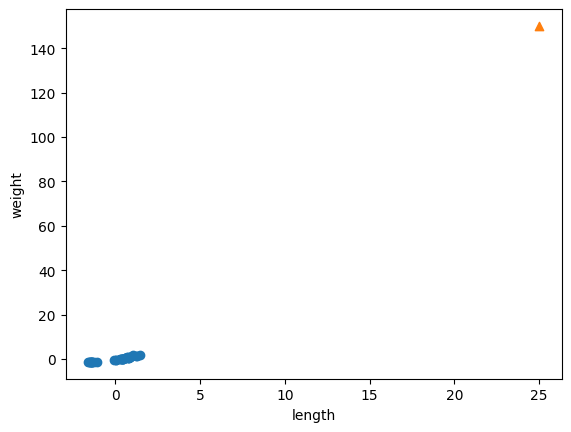

In [312]:
# the not-yet-standardized test data([[25,150]]) distorts the plot
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [313]:
new = ([25,150] - mean) / std

In [314]:
new

array([-0.11507497, -0.83340638])

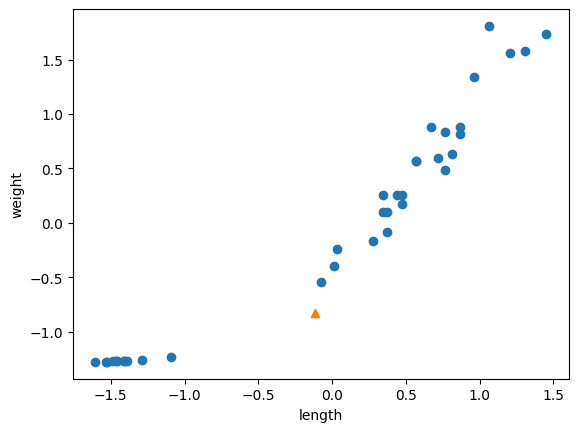

In [315]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [316]:
test_scaled = (test_input - mean) / std

In [317]:
from sklearn.neighbors import KNeighborsClassifier

kn1 = KNeighborsClassifier()
kn1.fit(train_scaled, train_target)
kn1.score(test_scaled, test_target)

1.0

In [320]:
# now it is reasonably grouppig it into Swedish,1
print(kn1.predict([new]))

[1]


In [326]:
distances, indexes = kn1.kneighbors([new])

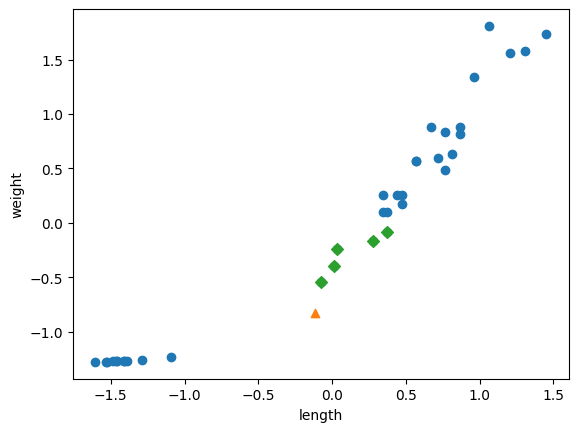

In [327]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# Model's accuracy score - Use test dataset

In [328]:
# Now the model 'correctly' classifies the test fish as caegory 1 (i.e., McFish)
# This is a convenience method same as accuracy_score() shown below.
kn.score(test_scaled, test_target)

0.23076923076923078

# Performance Evaluation: Confusion Matrix and the Four Classification Peformance Metrics   

- **Accuracy** : assesses the overall correctness of the model (obtainable by ``kn.score()``) : $\frac{TP + TN}{TP + TN + FP + FN}$
- **Specificity**: measures the ability to correctly identify negatives :  $\frac{TN}{TN + FP}$
- **Precision**: focuses on the correctness of positive predictions: $\frac{TP}{TP + FP}$
- **Recall** (Sensitivity): measures ability to identify all relevant instances: $\frac{TP}{TP + FN}$

In [329]:
confusion_matrix?

In [330]:
from sklearn.metrics import confusion_matrix
# Get the confusion matrix
cm = confusion_matrix(test_target, kn.predict(test_scaled))
# Convert the confusion matrix to a DataFrame
cm_df = pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
# Print the DataFrame
print(cm_df)



          Predicted 0  Predicted 1
Actual 0            3            0
Actual 1           10            0


In [331]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Four classification metrics
accuracy = accuracy_score(test_target, kn.predict(test_scaled))
specificity = recall_score(test_target, kn.predict(test_scaled), pos_label=0)
precision = precision_score(test_target, kn.predict(test_scaled), pos_label=1)
recall = recall_score(test_target, kn.predict(test_scaled), pos_label=1)

print("Accuracy:", accuracy)
print("Specificity:", specificity)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.23076923076923078
Specificity: 1.0
Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
